In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
from gradinho import Scalar
from draw import draw_dot

In [2]:
a = 5
b = 3
c = 9
h = 0.001
# r = a*b + c
r1 = a*b + c
r2 = a*b + c+h

# dr/da = 3
# dr/db = 5
# dr/dc = 1
dr_dc = (r2 - r1)/h
print(r1)
print(r2)
print(dr_dc)

24
24.001
1.0000000000012221


In [3]:
a = Scalar(3.0) 
a.label = 'a'
b = Scalar(7.0)
b.label = 'b'
c = b + a
c.label = 'c'
d = Scalar(0.3)
d.label = 'd'
e = c * d
e.label = 'e'
f = e.tanh()
f.label = 'f'


# df/df
df_df = 1.0
f.grad = df_df

# df/de
df_de = 1 - e.tanh()**2
e.grad = df_de.value

# df/dd = df/de * de/dd
de_dd = c.value
df_dd = df_de * de_dd
d.grad = df_dd.value

# df/dc = df/de * de/dc
de_dc = d.value
df_dc = df_de * de_dc
c.grad = df_dc.value

# df/db = df/de * de/dc * dc/db
dc_db = 1.0
df_db = df_de * de_dc * dc_db
b.grad = df_db.value

# df/da = df/de * de/dc * dc/da
dc_da = 1.0
df_da = df_de * de_dc * dc_da
a.grad = df_da.value




print(f"a : {a.value} Gradient of a: {a.grad}")
print(f"b : {b.value} Gradient of b: {b.grad}")
print(f"a : {d.value} Gradient of c: {d.grad}")


NameError: name 'math' is not defined

In [13]:
def test_grads():
    import torch

    # Define variables with requires_grad=True to track computation for gradients
    a = torch.tensor(3.0, requires_grad=True)
    b = torch.tensor(7.0, requires_grad=True)
    c = b + a

    d = torch.tensor(0.3, requires_grad=True)
    
    # Define intermediate variables
    e = c * d
    f = e.tanh()


    # Compute gradients
    f.backward()
    # Print gradients
    print(f"a : {a.data} Gradient of a: {a.grad}")
    print(f"b : {b.data} Gradient of b: {b.grad}")
    print(f"d : {d.data} Gradient of c: {d.grad}")

test_grads()

a : 3.0 Gradient of a: 0.0029597945977002382
b : 7.0 Gradient of b: 0.0029597945977002382
d : 0.30000001192092896 Gradient of c: 0.09865981340408325


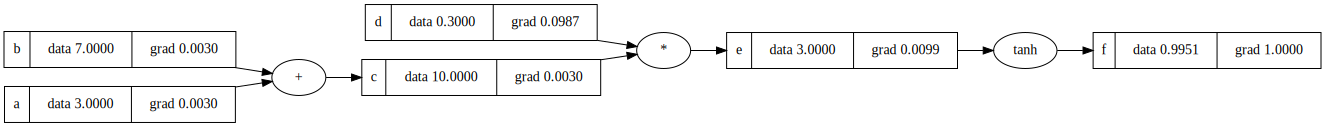

In [14]:
draw_dot(f)